In [291]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 300)
import praw #reddit data api
import ffn #for loading financial data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import re #regex
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint
import requests
import json
import csv
import time
import datetime

In [292]:
import tensorflow as tf
from tensorflow import keras
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu (if applicable)

''

In [293]:
df = pd.read_csv('dd_comments.csv')

In [294]:
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,[1615411278.0]
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,[1615409194.0]
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,[1615411615.0]
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,[1615410164.0]
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,[1615409129.0]


In [295]:
from dateutil import parser
ds = '2012-03-01T10:00:00Z' # or any date sting of differing formats.
date = parser.parse(ds)

In [296]:
#df['Date'] = datetime.datetime.fromtimestamp(df['Created_Date_UTC']).date()
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,[1615411278.0]
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,[1615409194.0]
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,[1615411615.0]
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,[1615410164.0]
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,[1615409129.0]


In [297]:
df['Created_Date_UTC'] = df.Created_Date_UTC.str.replace("[", "")
df['Created_Date_UTC'] = df.Created_Date_UTC.str.replace("]", "")
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,1615411278.0
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,1615409194.0
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,1615411615.0
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,1615410164.0
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,1615409129.0


In [298]:
for index, row in df.iterrows():
    orig_utc = row[10]
    size = len(row[10])
    mod_utc = orig_utc[:size - 2]
    df.at[index, 'Created_Date_UTC'] = mod_utc

In [299]:
df['Created_Date_UTC'] = pd.to_numeric(df['Created_Date_UTC'])

In [300]:
#format = "%y/%m/%d %H:%M:%S.%f"
for index, row in df.iterrows():
    #dt_object = datetime.datetime.strptime(row[10], format)
    #print(dt_object)
    utc_date = row[10]
    #print(date)
    #print(datetime.datetime.fromtimestamp(utc_date).strftime("%m/%d/%Y"))
    #df['Date'] = 
    date = datetime.datetime.fromtimestamp(utc_date).date()
    df.at[index, 'Date'] = date

In [301]:
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC,Date
0,Comment,m27zg5,gqhu5kj,t3_m27zg5,peon2,['This thread is the greatest trilogy since LO...,NaN,NaN,False,556,1615411278,2021-03-10
1,Comment,m27zg5,gqhpcdw,t3_m27zg5,CoolJoeFlaccid,['“WE CAN REMAIN RETARDED LONGER THAN YOU CAN ...,NaN,NaN,False,3503,1615409194,2021-03-10
2,Comment,m27zg5,gqhuxc0,t3_m27zg5,sarcasticsnowleopard,"[""im still in because of the guy at my college...",NaN,NaN,False,2376,1615411615,2021-03-10
3,Comment,m27zg5,gqhrmpp,t3_m27zg5,noobsbane283,"['Imagine throwing 750,000 shorts at a stock t...",NaN,NaN,False,9979,1615410164,2021-03-10
4,Comment,m27zg5,gqhp6tk,t3_m27zg5,alcycul,['Considering what happened today the fact we ...,NaN,NaN,False,13353,1615409129,2021-03-10


In [302]:
min_date = min(df['Date'])
max_date = max(df['Date'])
print(min_date)
print(max_date)

2021-02-28
2021-03-15


In [303]:
df = df.sort_values(by='Date')
df.reset_index(drop=True, inplace=True)
df.head()

,Post_Type,Submission_ID,Comment_ID,Parent_ID,Author,Body,Flair,Distinguished,Is_Author,Score,Created_Date_UTC,Date
0,Comment,luqc3p,gp8xuhi,t3_luqc3p,Superfiend78,['Could we get a GME thread again mods?\nPrett...,NaN,NaN,False,96,1614558804,2021-02-28
1,Comment,luqc3p,gp9ikim,t3_luqc3p,NaN,['[removed]'],NaN,NaN,False,19,1614570630,2021-02-28
2,Comment,luqc3p,gp9jpgr,t3_luqc3p,BraveLittlePene,['NIO earnings tomorrow ! Expecting good things'],NaN,NaN,False,18,1614571323,2021-02-28
3,Comment,luqc3p,gp9my0o,t3_luqc3p,markcima,"['Cathie bought more PLTR on Friday.. so yea, ...",NaN,NaN,False,16,1614573396,2021-02-28
4,Comment,luqc3p,gp9okuk,t3_luqc3p,NaN,['[deleted]'],NaN,NaN,False,16,1614574493,2021-02-28


In [304]:
comments_by_day = []
comments_list = []
prev_date = min_date
current_date = ""
dates = []
for index, row in df.iterrows():
    current_date = row[11]
    if prev_date == current_date:
        comments_list.append(row[5])
    else:
        comments_by_day.append(comments_list)
        dates.append(current_date)
        prev_date = current_date
        comments_list = []
        comments_list.append(row[5])

In [305]:
## run vader sentiment analyzer

analyzer = SIA()

scores=[]
for comments in comments_by_day:
    sentiment_score=0
    try:
        for comment in comments:
            sentiment_score=sentiment_score+analyser.polarity_scores(comment)['compound']
    except TypeError:
        sentiment_score=0
    
    scores.append(sentiment_score)
    
#df_1['sentiment score']=scores

In [306]:
print(scores)

[7.751500000000004, -0.4717999999999979, 11.031500000000001, 8.5183, 9.019600000000004, 17.2931, 3.538400000000003, 13.878199999999998]


In [307]:
zip_lists = list(zip(dates, comments_by_day, scores))

In [308]:
daily_comments_df = pd.DataFrame(zip_lists, columns = ['Date', 'Comments', 'Score'])
daily_comments_df.head()

,Date,Comments,Score
0,2021-03-01,[['Could we get a GME thread again mods?\nPret...,7.7515
1,2021-03-02,"[['PLTR please 🙏'], ['PLTR to $30 EOW'], ['gme...",-0.4718
2,2021-03-03,"[['GME! AMC! RKT!'], ['UWM boom!! Liftoff'], [...",11.0315
3,2021-03-09,"[['That’s enough wsb for today'], ['Bagholders...",8.5183
4,2021-03-10,"[['[removed]'], ['AMC almost back to 12. After...",9.0196


In [309]:
## merge with spy price and plot

#spy=ffn.get('spy', start='2020-11-01')
spy=ffn.get('spy', start=min_date)

In [310]:
spy_vals=[]
for date in daily_comments_df['Date'].tolist():
    try:
        spy_vals.append(float(spy.loc[date]))
    except KeyError:
        spy_vals.append(None)  
daily_comments_df['spy']=spy_vals

In [311]:
daily_comments_df=daily_comments_df[['Date','Score','spy']]
daily_comments_df=daily_comments_df.set_index('Date')
daily_comments_df=daily_comments_df[daily_comments_df['spy'].notna()]

daily_comments_df.to_csv('positive+negative_sentiment_data_1.csv')

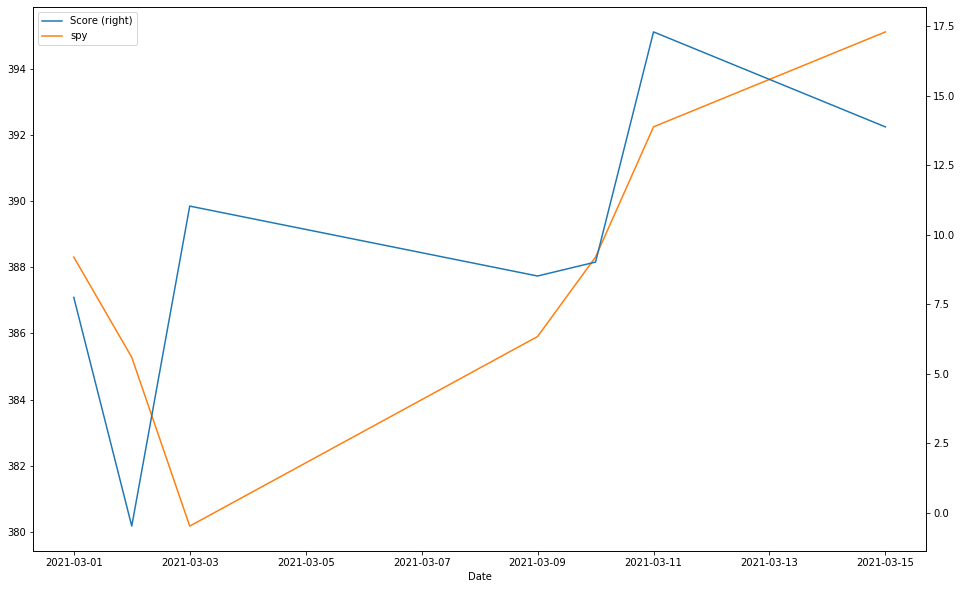

In [312]:
daily_comments_df.plot(secondary_y='Score', figsize=(16, 10));

In [313]:
daily_comments_df.head()

,Score,spy
Date,,
2021-03-01,7.7515,388.308197
2021-03-02,-0.4718,385.278137
2021-03-03,11.0315,380.174835
2021-03-09,8.5183,385.906067
2021-03-10,9.0196,388.308197


In [325]:
shifted_scores = daily_comments_df[['Score']]

In [326]:
shifted_scores.head()

,Score
Date,
2021-03-01,7.7515
2021-03-02,-0.4718
2021-03-03,11.0315
2021-03-09,8.5183
2021-03-10,9.0196


In [327]:
shifted_scores['Score_Shift'] = shifted_scores.shift(1)

In [328]:
shifted_scores.head()

,Score,Score_Shift
Date,,
2021-03-01,7.7515,NaN
2021-03-02,-0.4718,7.7515
2021-03-03,11.0315,-0.4718
2021-03-09,8.5183,11.0315
2021-03-10,9.0196,8.5183


In [329]:
shifted_scores.reset_index(inplace=True)

In [330]:
shifted_scores.head()

,Date,Score,Score_Shift
0,2021-03-01,7.7515,NaN
1,2021-03-02,-0.4718,7.7515
2,2021-03-03,11.0315,-0.4718
3,2021-03-09,8.5183,11.0315
4,2021-03-10,9.0196,8.5183


In [331]:
spy_vals=[]
for date in shifted_scores['Date'].tolist():
    try:
        spy_vals.append(float(spy.loc[date]))
    except KeyError:
        spy_vals.append(None)  
shifted_scores['spy']=spy_vals

In [333]:
shifted_scores.set_index('Date')

,Score,Score_Shift,spy
Date,,,
2021-03-01,7.7515,NaN,388.308197
2021-03-02,-0.4718,7.7515,385.278137
2021-03-03,11.0315,-0.4718,380.174835
2021-03-09,8.5183,11.0315,385.906067
2021-03-10,9.0196,8.5183,388.308197
2021-03-11,17.2931,9.0196,392.245300
2021-03-15,13.8782,17.2931,395.115906


In [334]:
shifted_scores_plot = shifted_scores[['Score_Shift', 'spy']]

In [335]:
shifted_scores_plot=shifted_scores_plot[shifted_scores_plot['Score_Shift'].notna()]

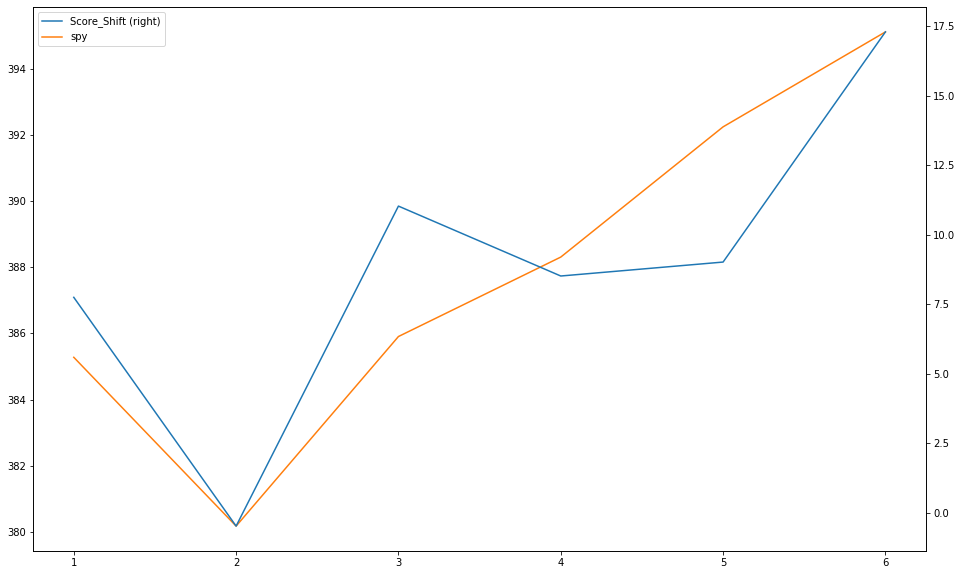

In [336]:
shifted_scores_plot.plot(secondary_y='Score_Shift', figsize=(16, 10));

In [337]:
# Calculate Correlation between SPY price and sentiment from prev day
import scipy.stats as st
from scipy.stats import ttest_ind

price = shifted_scores_plot['spy']
prev_sent = shifted_scores_plot['Score_Shift']
correlation = st.pearsonr(price,prev_sent)
print(f"The correlation between the SPY price and sentiment from previous day is {round(correlation[0],2)}")

The correlation between the SPY price and sentiment from previous day is 0.87
